## Example of using curvilinear grid

Polar coordinates ($r,\theta$) with the singularity at $r=0$ 

In [1]:
using PyPlot
using DIVAnd


In [2]:
ri,ti = ndgrid(range(0.001,stop=1,length=100),range(0,stop=2pi,length=210));
# take out last theta to not close, that will be done by moddim
#
ri=ri[:,1:end-1]
ti=ti[:,1:end-1]

mask = trues(size(ri));

In [3]:
# For plotting purposes
xi=ri.*cos.(ti)
yi=ri.*sin.(ti);
fi=sin.(4*xi) .* cos.(4*yi);


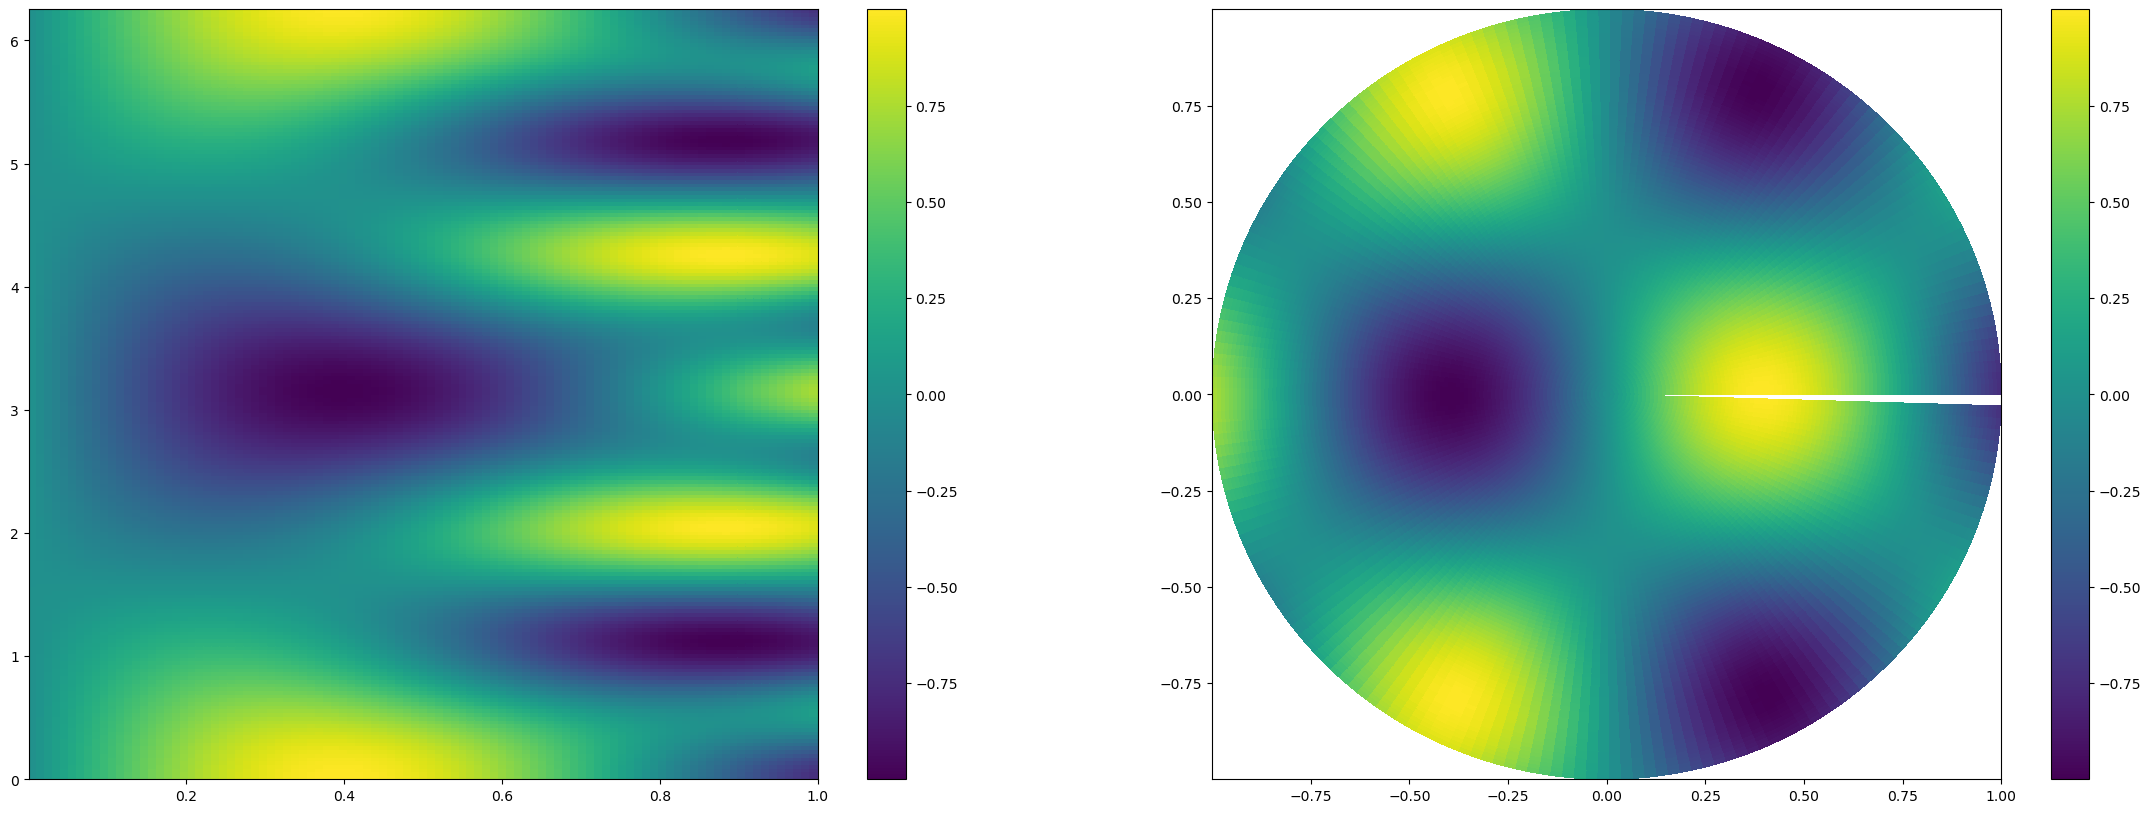

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\jmbeckers\.julia\packages\PyCall\L0fLP\src\numpy.jl:67
sys:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


(PyObject <matplotlib.collections.PolyCollection object at 0x000000009A5375E0>, PyObject <matplotlib.colorbar.Colorbar object at 0x000000009AA74160>)

In [4]:
figure(figsize=(28,10))
subplot(1,2,1)
pcolor(ri,ti,fi),colorbar()
subplot(1,2,2)
pcolor(xi,yi,fi),colorbar()

Naive interpolation; note how the scale of the patch changes depending on the position

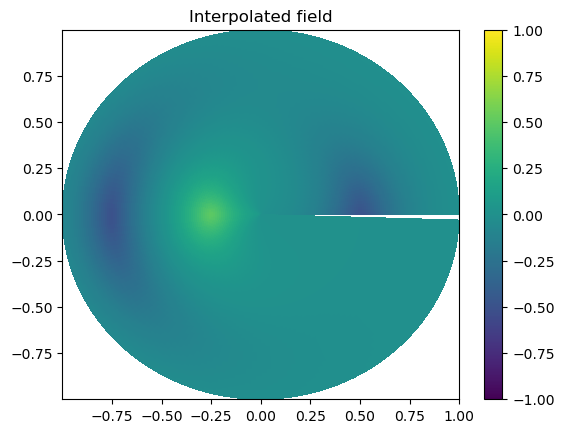

In [5]:
# naive analysis as if polar coordinates where cartesian
pmc = ones(size(ri)) / (ri[2,1]-ri[1,1]);
pnc = ones(size(ti)) / (ti[1,2]-ti[1,1]);
r=[0.25,0.5,0.75]
t=[pi,0.0,pi]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pmc,pnc),(ri,ti),(r,t),f,(0.1,pi/7),1.0);

pcolor(xi,yi,fi);
colorbar()
clim(-1,1)
title("Interpolated field");

Now using the real metrics. Here done by hand; for lon,lat coordinates on Earth, there is a predefined function DIVAnd_metric you can use directly

In [6]:
# metrics

function mydistance(r1,t1,r2,t2)
   
    x1=r1*cos(t1)
    y1=r1*sin(t1)
    x2=r2*cos(t2)
    y2=r2*sin(t2)
    
    return sqrt((x2-x1)^2+(y2-y1)^2)
    
end

function DIVAnd_mymetric(rad::Array{T,2}, t::Array{T,2}) where {T}
    sz = size(rad)
    pm = zeros(sz)
    pn = zeros(sz)


    for i = 1:sz[1]
        i0 = max(i - 1, 1)
        i1 = min(i + 1, sz[1])

        for j = 1:sz[2]
            j0 = max(j - 1, 1)
            j1 = min(j + 1, sz[2])

            dx = mydistance(rad[i0, j], t[i0, j], rad[i1, j], t[i1, j]) / (i1 - i0)
            dy = mydistance(rad[i, j0], t[i, j0], rad[i, j1], t[i, j1]) / (j1 - j0)

            dx = real(dx)
            dy = real(dy)

            pm[i, j] = 1 / dx
            pn[i, j] = 1 / dy
        end
    end

    return pm, pn
end

DIVAnd_mymetric (generic function with 1 method)

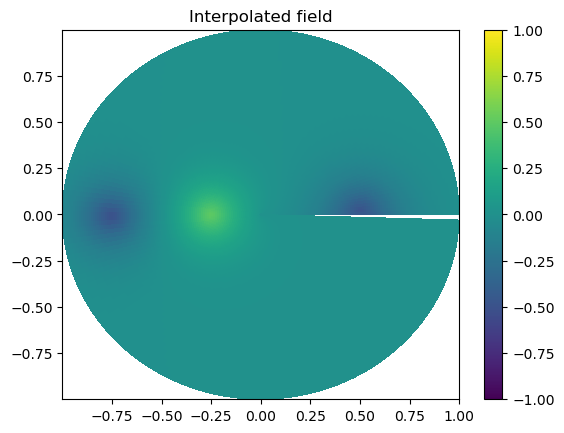

In [7]:
pm,pn=DIVAnd_mymetric(ri,ti)

r=[0.25,0.5,0.75]
t=[pi,0.0,pi]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(ri,ti),(r,t),f,(0.1,0.1),1.0);

pcolor(xi,yi,fi);
colorbar()
clim(-1,1)
title("Interpolated field");

Now adding periodicy. Note how the analyses wraps around (the gap is just a plotting artefact due to pcolor not aware of the periodicity closing

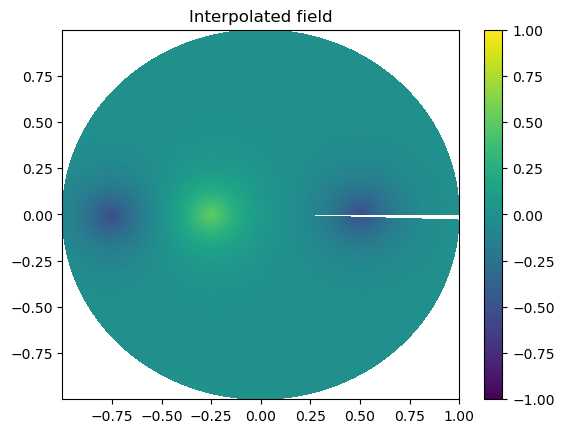

In [8]:


r=[0.25,0.5,0.75]
t=[pi,0.0,pi]
f=[1.0,-1.0,-1.0]
fi,s = DIVAndrun(mask,(pm,pn),(ri,ti),(r,t),f,(0.1,0.1),1.0,moddim=[0,1]);

pcolor(xi,yi,fi);
colorbar()
clim(-1,1)
title("Interpolated field");


Now look at the real data for correct and naive analysis. Sample in real domain of course!

In [9]:
x=-1 .+ 2*rand(100)
y=-1 .+ 2*rand(100)
r=sqrt.(x.^2 .+ y.^2)
t=atan.(y,x) .+ pi # to map to 0 to 2 pi
f=sin.(4*x) .* cos.(4*y);

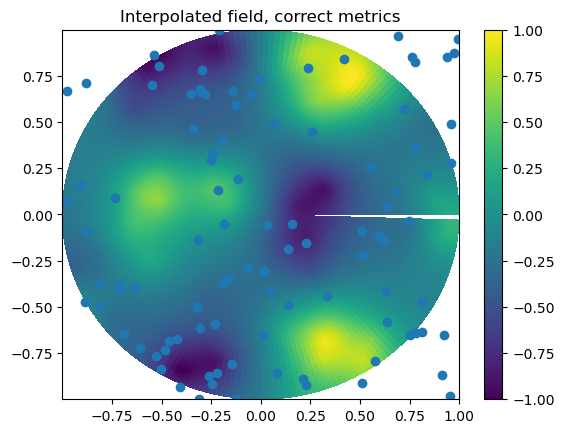

In [10]:
fi,s = DIVAndrun(mask,(pm,pn),(ri,ti),(r,t),f,(0.1,0.1),1.0,moddim=[0,1]);

pcolor(xi,yi,fi);
scatter(x,y)
colorbar()
clim(-1,1)
title("Interpolated field, correct metrics");

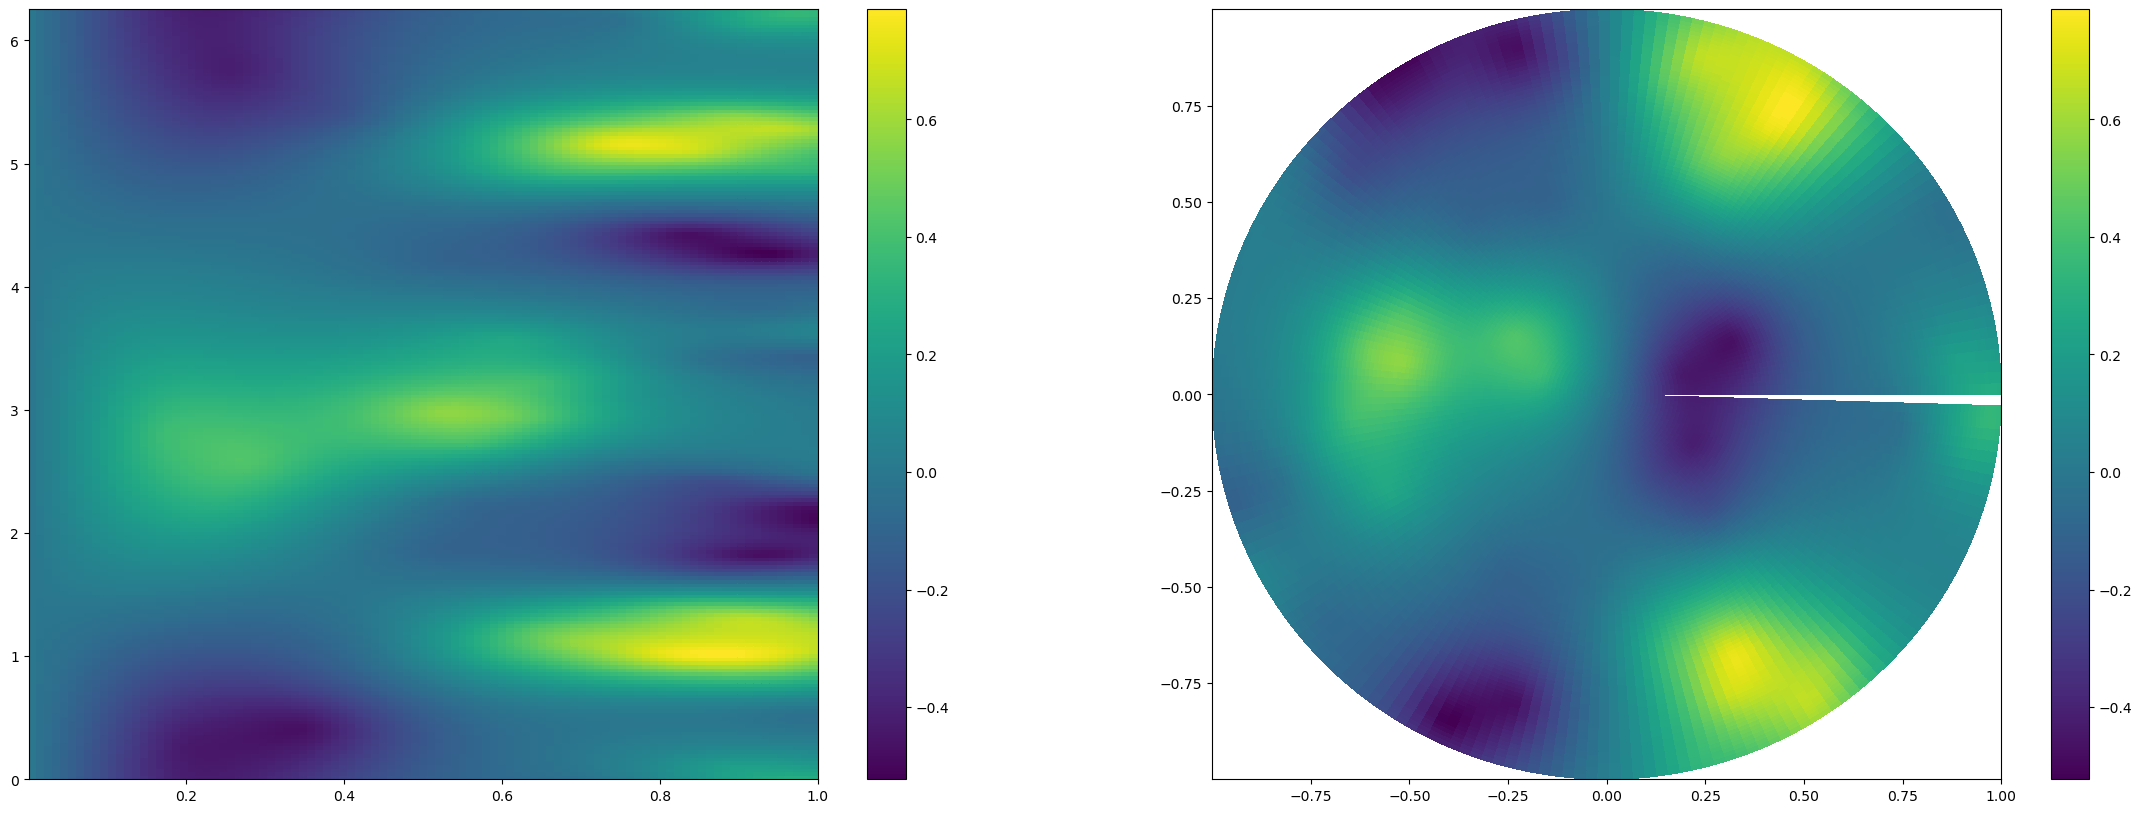

(PyObject <matplotlib.collections.PolyCollection object at 0x00000000A38D7400>, PyObject <matplotlib.colorbar.Colorbar object at 0x00000000A3909490>)

In [11]:
figure(figsize=(28,10))
subplot(1,2,1)


pcolor(ri,ti,fi),colorbar()
subplot(1,2,2)


pcolor(xi,yi,fi),colorbar()

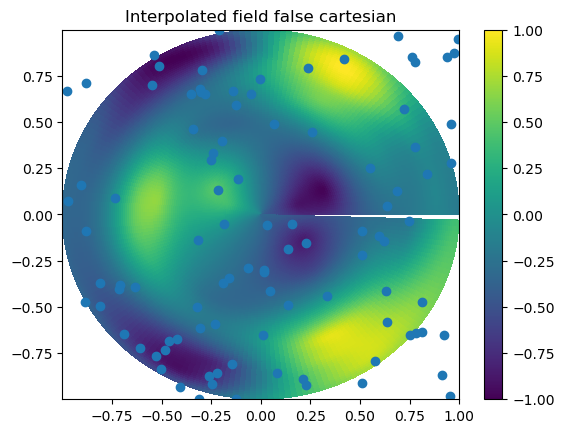

In [12]:

fi,s = DIVAndrun(mask,(pmc,pnc),(ri,ti),(r,t),f,(0.1,pi/7),1.0);
pcolor(xi,yi,fi);
scatter(x,y)
colorbar()
clim(-1,1)
title("Interpolated field false cartesian");

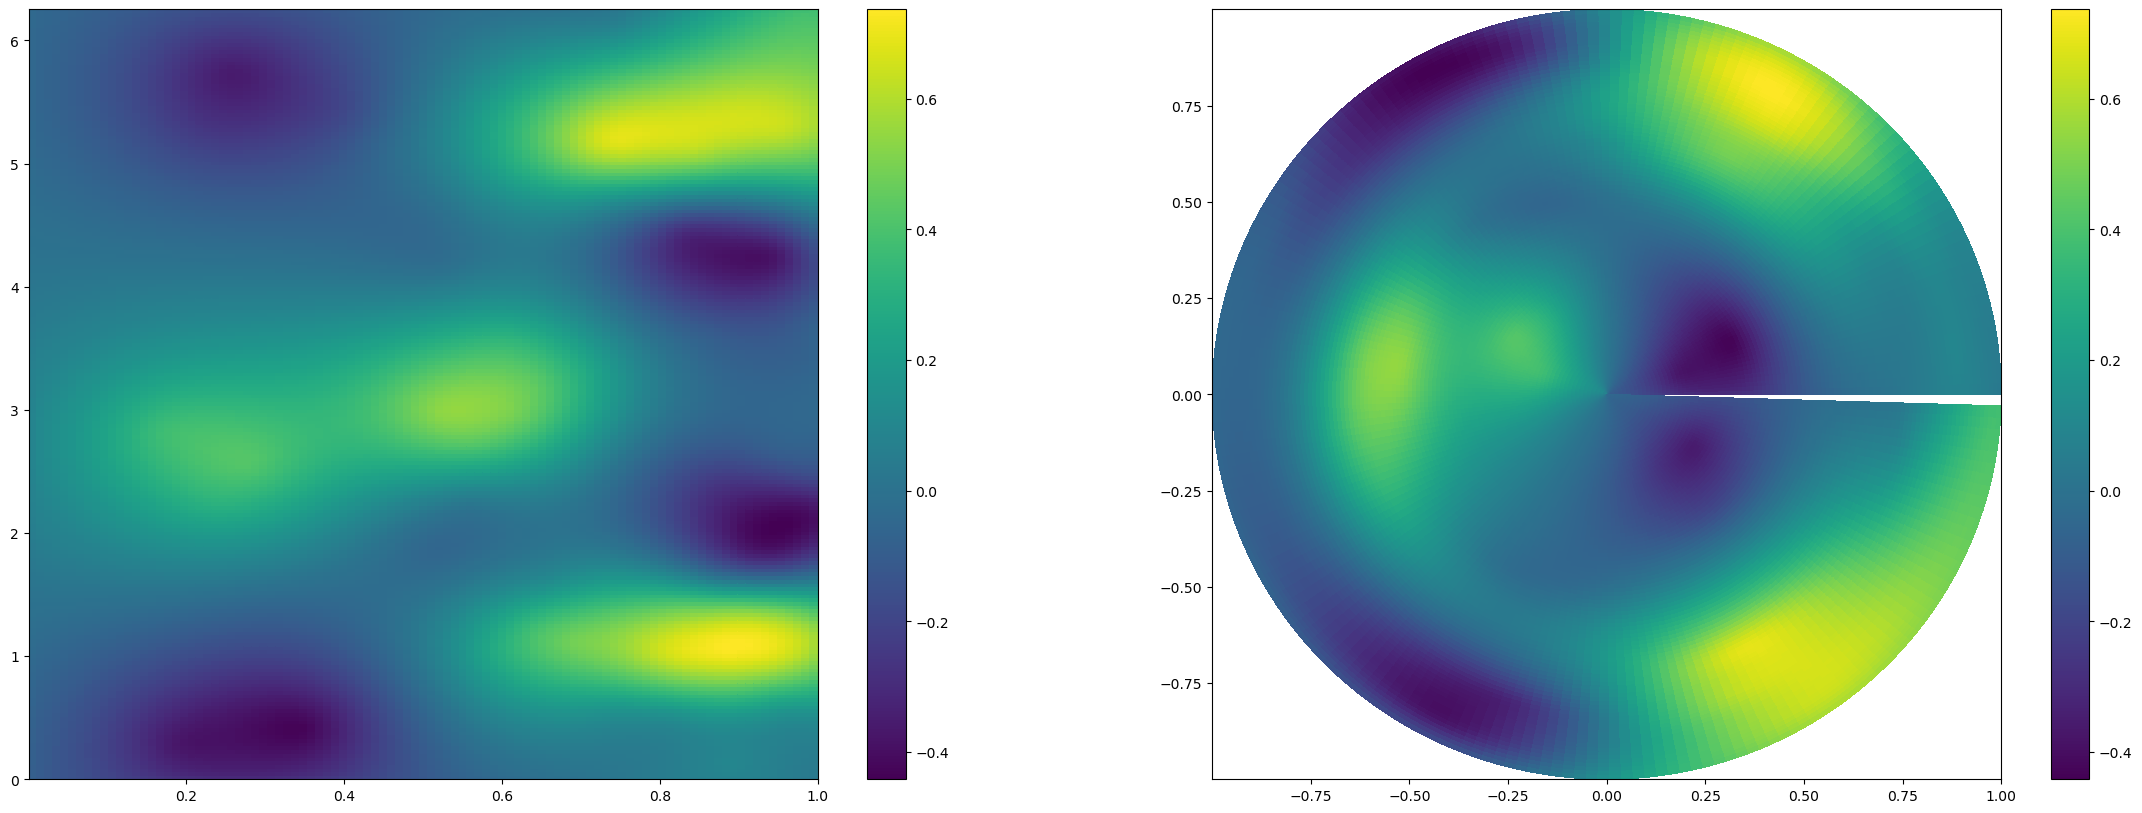

(PyObject <matplotlib.collections.PolyCollection object at 0x0000000000EED9D0>, PyObject <matplotlib.colorbar.Colorbar object at 0x0000000001C41AF0>)

In [13]:
figure(figsize=(28,10))
subplot(1,2,1)


pcolor(ri,ti,fi),colorbar()
subplot(1,2,2)


pcolor(xi,yi,fi),colorbar()